<a href="https://colab.research.google.com/github/ArthurCAchigbu/data-science-projects/blob/main/Python_project_solution_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ploty
import plotly.express as px

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/foodhub_order.csv')
# view the first 5 rows
ds.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# view the last 5 rows
ds.tail()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#check the shape of the dataframe
ds.shape

(1898, 9)

In [ ]:
print('The dataframe has', ds.shape[0], 'rows and', ds.shape[1],'columns.')

NameError: ignored

### Observations:

*  The dataframe consists of 1898 rows and 9 columns
*  Each data row contains values in relation to an online food order.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


* There are 9 columns in the dataframe namely: order_id, customer_id, restaurant_name, cuisine_type, cost_of_order, day_of the week, rating, food_preparation time and delivery_time.  
* All categories have 1898 non-null values which means that no data is missing.
* The dataframe consists of 4 columns int64 datatype, 1 column containing float64 datatype and 4 columns containing object types.  
*  After further croschecking, it was noticed that rating bears the wrong datatype.
NOTE; We will also be changing the datatype for order_id and customer_id as they are categorical variables.





In [ ]:
# firstly, we check why rating has a wrong datatype 
ds['rating'].unique

<bound method Series.unique of 0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object>

###Observation: 
From this, we can see that some rows are inputed as 'Not given' and that changes the datatype to object. 

In [ ]:
# check what its original datatype should be to confirm
ds['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
# replace the 'Not given' values to NaN(Not a Number)
ds['rating']=ds['rating'].replace(['Not given'],np.nan)

In [ ]:
# change the datatypes for all the columns that have a wrong datatype
ds['rating']=ds['rating'].astype(float)

In [ ]:
ds['order_id']=ds['order_id'].astype(object)

In [ ]:
ds['customer_id']=ds['customer_id'].astype(object)

In [ ]:
# confirm change
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


##Observations: 

* There are now 2 float columns, 2 int64 columns and 5 object columns
* All the corrections to the datatype has been effected.
* Now we can notice that the ratings variable has some missng values  




 




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# missing value treatment 
# missing value check
ds.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

### Observations:
There are 736 rows with missing values on the rating column; all other columns have 0 missing values.



In [ ]:
# use the drop method to treat missing value
# remove null values from the ratings column
ds1=ds[ds['rating'].notnull()]


In [ ]:
# missing value check on treated dataframe
ds1.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

###Observation: 
The dataframe has succesfully been treated for missing values by dropping the rows missing values on the rating column. All columns now have 0 null values. 

In [ ]:
# reset the indexing
ds1.reset_index(drop=True,inplace=True)

In [ ]:
ds1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
2,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
3,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
4,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30


In [ ]:
ds1.info()

NameError: ignored

In [ ]:
print('The treated dataframe has',ds1.shape[0], 'rows and', ds1.shape[1], 'columns.')

The treated dataframe has 1162 rows and 9 columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# statistical summary of data
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1162.0,4.344234,0.741478,3.00,4.00,5.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:
* From the above dataframe we can deduce that the statistical summary was gotten from 1162 entries.  
* The maximum cost of ordering food from a restuarant in new york is 35.41 (US dollars) and on average the cost of an order is 17(US dollars), the minimum cost of ordering food is $4.47 and 75% Of food orders cost 22.7(US dollars).
* On average customers give the rating of 4 and 75% of customers rate the services 5. 
* 75% percent of the time, the ordered food is prepared in 32min and the **Maximum time it takes for the food to be prepared is 35mins**,**and the minimum food preparation time of 20 mins, with an average preparation time of 27.3mins.  **
* it takes a min of 15min for food to be delivered and 50% of the time, food is delivered within 25min. 








In [ ]:
# check the count and % of all categorical values in each categorical variable
# first make a list of all categorical variables 
cat_cols=['customer_id','restaurant_name','cuisine_type','day_of_the_week']
# using for loop
for column in cat_cols:
  print(ds[column].value_counts())
  print('_'*40)

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
________________________________________
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
________________________________________
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cui

In [ ]:
# % of categorical vlues in each categorical variable
# usinf for loop 
for column in cat_cols:
  print(ds[column].value_counts(normalize=True))
  print('_'*40)

52832     0.006849
47440     0.005269
83287     0.004742
250494    0.004215
259341    0.003688
            ...   
385426    0.000527
254913    0.000527
289597    0.000527
74412     0.000527
397537    0.000527
Name: customer_id, Length: 1200, dtype: float64
________________________________________
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64
________________________________________
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Med

###Observation:
* From this, we now know that 11% of the online orders were for food from shakeshack and the restaurants with the highest customer orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.

* We also note that American,Japanese and  Italian cuisine were the most ordered.

* Most customers order on the weekend.

NB: This observation was made using the original compiled dataframe before missing value treatment, to ensure count accuracy.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Note that we have treated the missing values already.
# To check for missing values in the treated datframe we do
ds.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
There are 736 orders that are not rated on the original dataframe before treatment. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

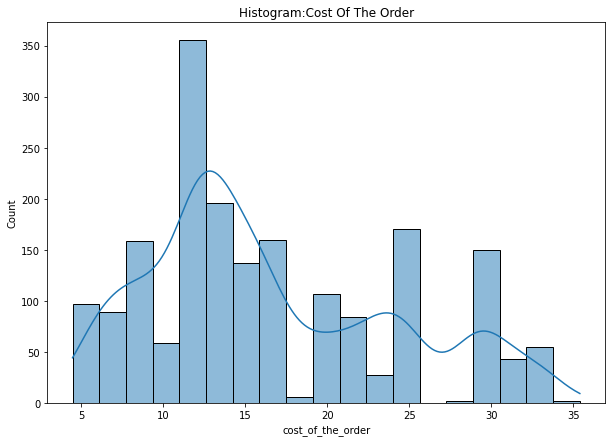

In [ ]:
# we will do a univarate analysis on all the columns containing numerical values 
# let's analyse cost of order
plt.figure(figsize=(10,7))
plt.title('Histogram:Cost Of The Order')
sns.histplot(data=ds,x='cost_of_the_order',stat='count',kde=True);

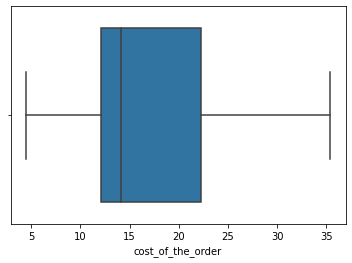

In [ ]:
sns.boxplot(data=ds,x='cost_of_the_order');

###Observation:
* From the box plot, we can see that the distribution is skewed to the right and the median cost of orders is around 14(USD). 
* The histogram shows that this distrubution is bimodal (has 2 peaks), this could be due to the two distinct groups of customers being students and working professionals.
* There are no outliers which means that there are no orders that are super expensive. 






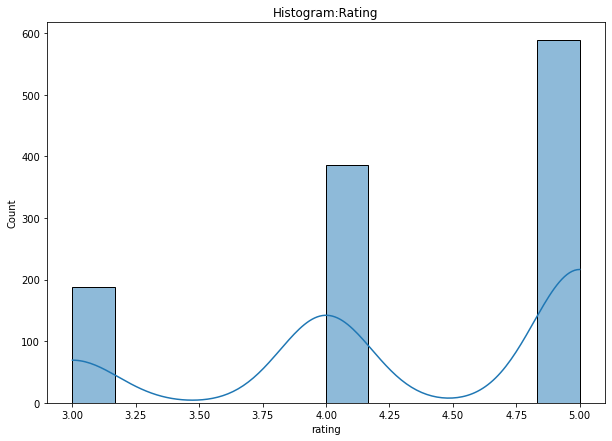

In [ ]:
# let's analyse rating
plt.figure(figsize=(10,7))
plt.title('Histogram:Rating')
sns.histplot(data=ds1,x='rating',stat='count',kde=True);

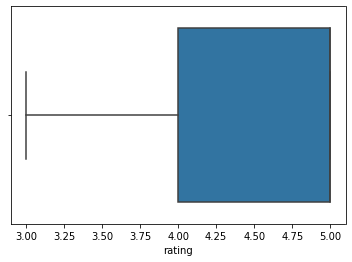

In [ ]:
sns.boxplot(data=ds1,x='rating');

###Observation
* The ratings are heavily skewed to the left and there are no right whiskers because the upper quartile is equal to the maximum rating given. 
* Majority of the cutomers who leave a rating, rate the services 5.

NB: The dataframe (ds1) which has been treated for missing rating values was used ro avoid error. 



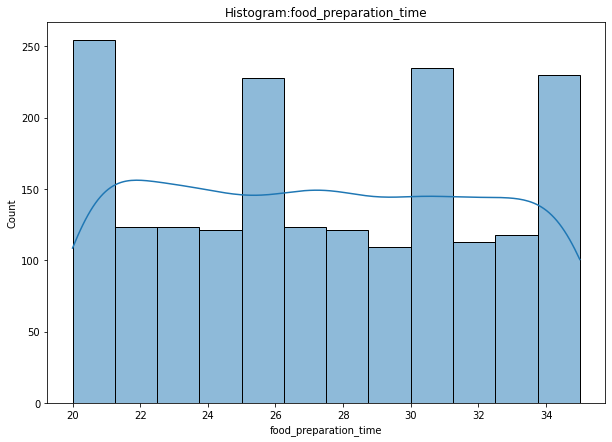

In [ ]:
# let's analyze food preparation time
plt.figure(figsize=(10,7))
plt.title('Histogram:food_preparation_time')
sns.histplot(data=ds,x='food_preparation_time',stat='count',kde=True);

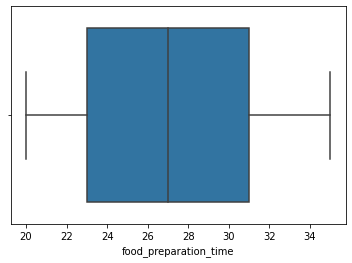

In [ ]:
sns.boxplot(data=ds,x='food_preparation_time');

###Observation:
* The boxplot showed that the distribution is zero skewed and this is because the mean and median of the distribution is almost equal. The food typically gets prepared within approx 20-37min and the mean food preparation time is around 27min  




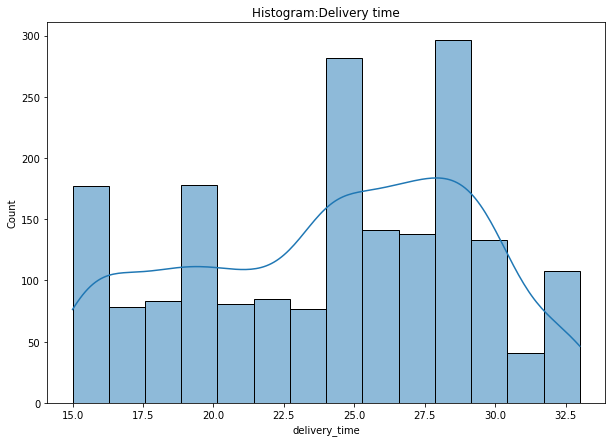

In [ ]:
# let's analyze delivery time
plt.figure(figsize=(10,7))
plt.title('Histogram:Delivery time')
sns.histplot(data=ds,x='delivery_time',stat='count',kde=True);

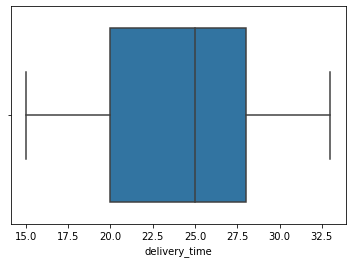

In [ ]:
sns.boxplot(data=ds,x='delivery_time');

###Observations:
* The distribution of delivery time is left skewed with 75% of the orders being delivered within 27.5mins and maximum delivery time being about 33mins.




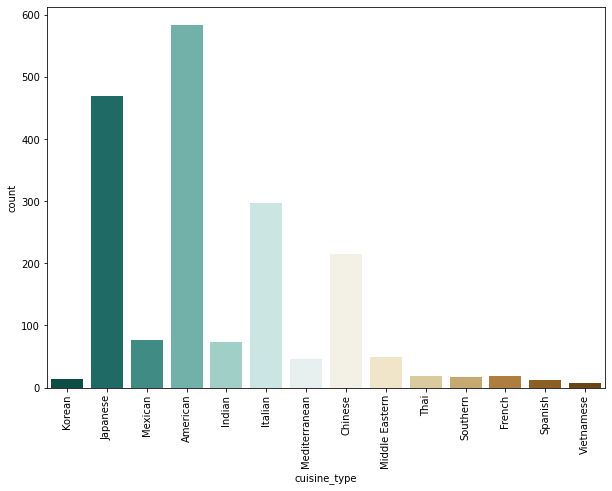

In [ ]:
# let's analyze number of oders per cuisine type
plt.figure(figsize=(10,7))
sns.countplot(data=ds,x='cuisine_type',palette='BrBG_r')
plt.xticks(rotation=90);

###Observations:
American cuisin is the most ordered cuisine with a count of almost 600 orders. other very popularly ordered cuisines are the japanese and the chinese cuisines. other cuisines have ower than 100 orders.


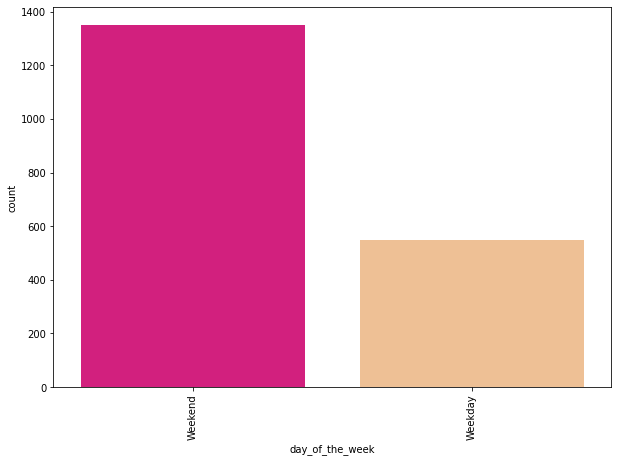

In [ ]:
#let's analyze number of oders by day of the week
plt.figure(figsize=(10,7))
sns.countplot(data=ds,x='day_of_the_week',palette='Accent_r')
plt.xticks(rotation=90);

###Observation:
There are more food orders on the weekends than on weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# find the count of the unique values on restaurant name and create a dataframe
ds.restaurant_name.value_counts().reset_index(name='number of orders').head(5)

,index,number of orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
The top 5 restaurants in terms of number of orders are
 
1.Shake Shack with 219 orders   
2.The Meatball Shop with 132 orders

3.Blue Ribbon Sushi wth 119 orders  
4.Blue Ribbin Fried Chicken with 96 orders

5.Parm with 68 orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
 # let's run through weekend orders grouping them by cuisine type and sort the out by number of order id's
 ds[ds['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',ascending=False)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_order_time
cuisine_type,,,,,,,,,
American,415,415,415,415,415,257,415,415,415
Japanese,335,335,335,335,335,199,335,335,335
Italian,207,207,207,207,207,110,207,207,207
Chinese,163,163,163,163,163,107,163,163,163
Mexican,53,53,53,53,53,32,53,53,53
Indian,49,49,49,49,49,36,49,49,49
Mediterranean,32,32,32,32,32,21,32,32,32
Middle Eastern,32,32,32,32,32,19,32,32,32
Thai,15,15,15,15,15,8,15,15,15


#### Observations:
The most popular cuisine ordered durung the weekends is the american cuisine with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# find the number of orders that cost above 20(USD)
# define the total order count as a new variable
# find the percentage of the above 20(USD)
ds2=ds[ds['cost_of_the_order']>20]
ds_new=ds2['cost_of_the_order'].count()
total_customer_order=ds['cost_of_the_order'].count()
percentage_of_orders_above_20=((ds_new/total_customer_order)*100)
print(round(percentage_of_orders_above_20,2))

29.24


#### Observations:
29.24% of the orders cost above 20(USD)

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# find mean using the mean function
round(ds['delivery_time'].mean(),2)

24.16

#### Observations:
* The mean delivery time is 24.16 mins, so the oders are delivered to customers in 24 mins on average.   



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# find the count of the unique order id's and create a dataframe
ds.customer_id.value_counts().reset_index(name='number of orders').head(5)

,index,number of orders
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


#### Observations:
The top 3 most frequent customers by Customer ID are;
1. Order ID-52832 with 13 orders   
2. Order ID-47440 with 10 orders  
3. Order ID-83287 with 9 orders





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


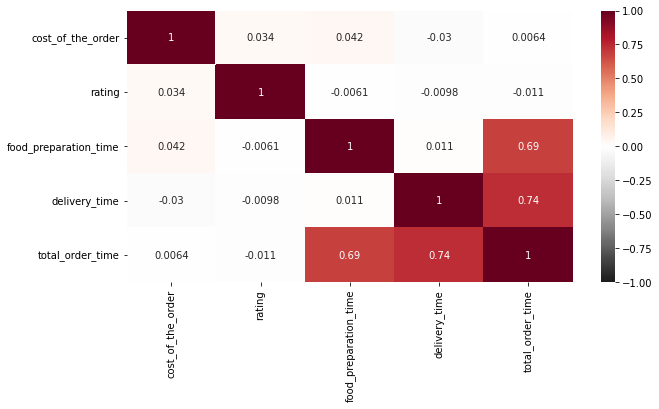

In [ ]:
# Do a heatplot to check the correlatoion between the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(),annot=True,cmap='RdGy_r',vmin=-1,vmax=1);

###Observations:
* from the heatmap we can see that there is no strong correlation between any the variables apart from between the total_order_time and the delivery and food preparatin times. 
* This correlation is because wecalculated total_order_time with values of food_preparation_time & delivery_time.  



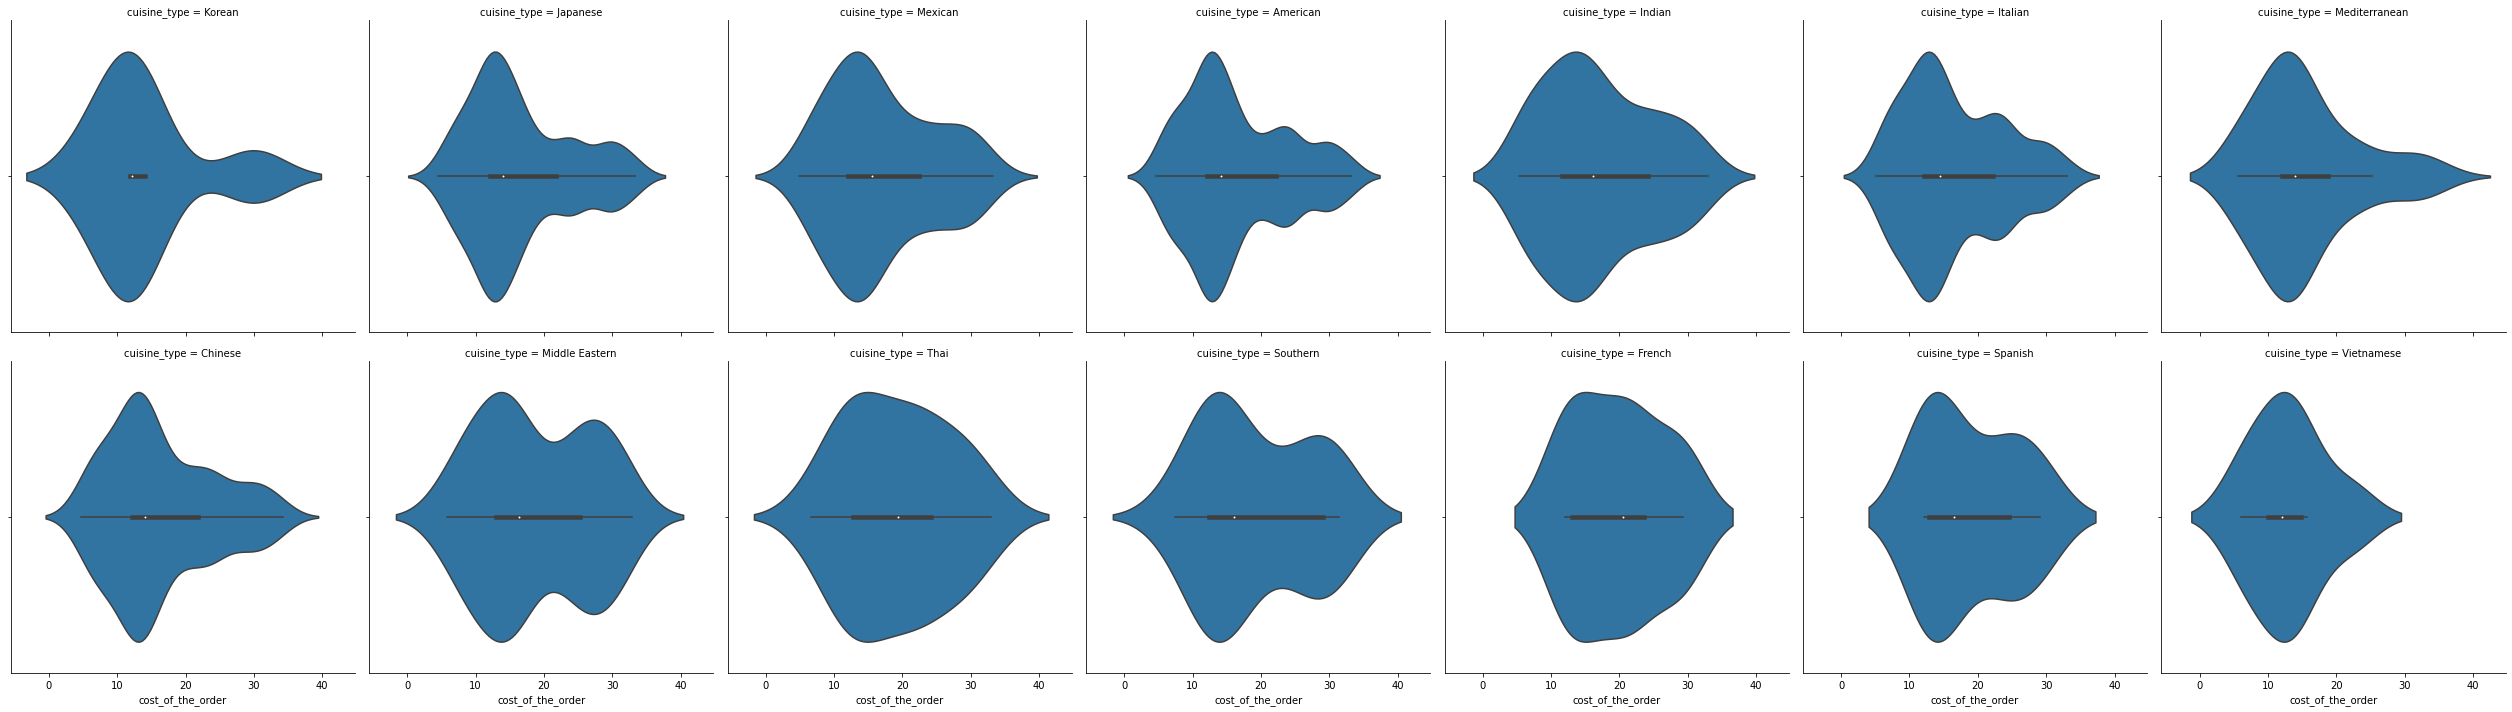

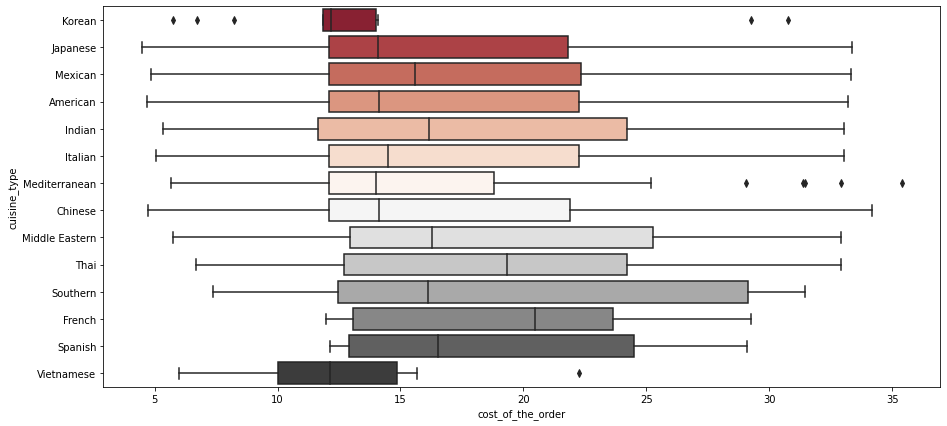

In [ ]:
# multivarate analysis using violin plot & boxplot
sns.catplot(data=ds,x='cost_of_the_order',col='cuisine_type',col_wrap=7, kind='violin')
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(data=ds,x='cost_of_the_order',y='cuisine_type',palette='RdGy')
plt.show()

###Observations:
Some cuisine types have a right skewed distribution while others have a left skewd distribution. some cuisine types spot outliers such as the Korean, Chinese and Mediterranean cuisine types

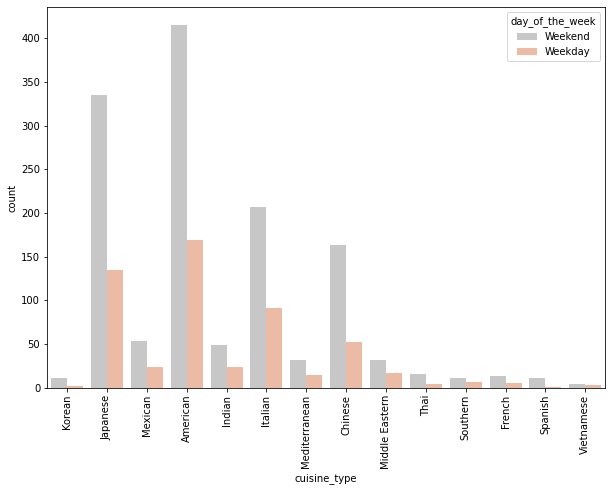

In [ ]:
# Multivariate analysis using countplot
plt.figure(figsize=(10,7))
sns.countplot(data=ds,x='cuisine_type',hue='day_of_the_week',palette='RdGy_r')
plt.xticks(rotation=90);

###Observations:
* All cuisine types were ordered more during the weekend than on weekdays.
* American cuisine has the highest order count.  



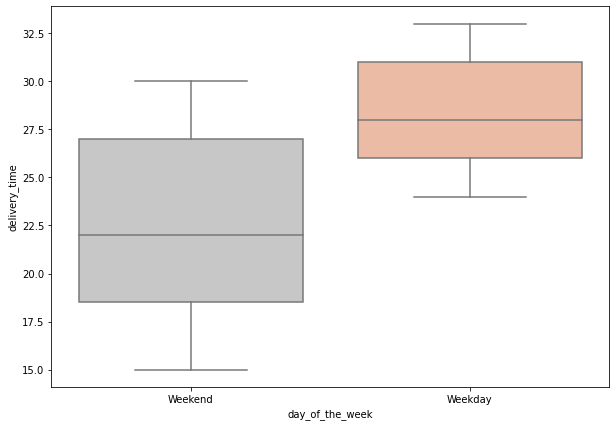

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=ds,x='day_of_the_week',y='delivery_time',palette='RdGy_r');

###Observations:
* 75% of orders during the weekend are delivered within 27mins, while 75% of orders are delivered within 32mins on weekdays.  
   



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
ds3=ds1.groupby(['restaurant_name',])[['rating','restaurant_name']].mean()>4
ds3.reset_index(inplace=True)
ds4=ds1.groupby(['restaurant_name',])[['rating']].count()>50
ds4.reset_index(inplace=True)
pd.merge(ds3[ds3['rating']== True], ds4[ds4['rating']== True],on ='restaurant_name')

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
The retaurants in the dataframe above with rating=True qualify for the promotional offer.
they are;
* Blue Ribbon Sushi
* Shake Shack
* Blue Ribbon Fried Chicken
* The Meatball Shop

NB: The dataframe treated for mising values was used to get above result.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# let's equate revenue and income to 0
revenue = 0
income = 0
#let's create a loop to iterate through individual values of the selected column using the stipulated conditions and then add it to the equated revenue value
for i in range(len(ds['cost_of_the_order'])):
    if (ds['cost_of_the_order'][i] > 20):
        income = ds['cost_of_the_order'][i]*0.25
    elif (ds['cost_of_the_order'][i] > 5) & (ds['cost_of_the_order'][i] < 20):
        income =ds['cost_of_the_order'][i]*0.15
    else:
        income = 0
    revenue = revenue + income
    round(revenue,1)

In [ ]:
print('Revenue generated accross all orders is: ',round(revenue,1),'(USD)',sep='')

Revenue generated accross all orders is: 6166.3(USD)


#### Observations:
* The company generated 6166.3(USD) in revenue across all orders above 5(USD)




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# fisrt create a new column that adds the delivery time to the food preparation time and equate it to a variable
# Then define a new variable as the values of rows with in the new column that are above >60
ds['total_order_time']=ds['delivery_time']+ds['food_preparation_time']
ds5=ds[ds['total_order_time']>60]
# count the number of values in newly defined variable and define it with a variable
# also count the number of orders
ds5_count=ds5['total_order_time'].count()
total_number_of_orders=ds['total_order_time'].count()
# calculate percentage 
percentage_of_orders_above60min=((ds5_count/total_number_of_orders)*100)
print(round(percentage_of_orders_above60min,2))

10.54


#### Observations:
* 10.54% of the orders take more than 60min to be delivered from the time the order was places.

Note: This takes into acconunt both the food preparation time and the delivery time.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
ds_weekend=ds.groupby(['day_of_the_week'])[['delivery_time']].mean() 
print(round(ds_weekend,2))
ds_weekend1=ds.groupby(['day_of_the_week'])[['order_id']].count() 
print(ds_weekend1)

                 delivery_time
day_of_the_week               
Weekday                  28.34
Weekend                  22.47
                 order_id
day_of_the_week          
Weekday               547
Weekend              1351


#### Observations:
* The mean delivery time for orders on weekdays is 28.34mins while the mean delivery time for orders on the weekend is22.47. It is also good to note that 547 orders were processed during the weekdays while 1351 orders were processed on the weekend.

*  More orders were processed and delivered during the weekends yet the mean delivery time is lower, this could be due to higher traffic which increases delivery time or more delivery persons are available on the weekends as people tend to take on part time jobs on weekends.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Two dataframes were used in the above computation and analysis, one was treated for missing vaues as some rows under ratings were inputed as 'Not given' and the other was not treated.
* The average customer rating is 4.3 and 75% of the rated orders had a rating of 5. However a few orders weren't rated.  
* The distribution of cost across various cuisine types is bimodal, this could be attributed to the two distinct groups(students and working professionals) that use the app to order food. This can not be verified from the present datatframe but can be verified if the count of students and working professionals using the app and their orders is taken.  
* The most frequntly ordered cuisine is the american cuisine followed by the japanese cuisine and the most popular restaurants getting the most orders are the shake shack and the meatball shop in that order. 
* More orders wwere processed and delivered during the weekend than the weekdays and comparing the delivery count with delivery time, an assumption that traffic levels could be a factor can be made. 
* for orders that take above 60mins to be delivered from the time of order, this is in large part due to delivery time as delivery time varied in comparison to food preparation time.  
*  







### Recommendations:
* Customer satisfaction seemed high as majority of those who rated gave a high rating score, however it is good to note that the reason for some customers not leaving  ratings should be explored as this may improve the companies customer service delivery and overall performance. one of the major areas to explore is the user-interface as one of the reason customers may choose not to rate is because they do not find the app's user-interface friendly or just can't figure out how to rate.  

* Delivery time should be improved as the major reason for long total order time is the delivery time. More delivery persons should be employed to reduce number of deliveries a particular delivery person has to make. The company should also look into other ways to reduce delivery time.

* More data about the two major target market of the company being students and working profssionals should be collected to enable the company do a better analysis on customer preference and how to improve customer satisfaction for each group. 



---